# Day 9

In [14]:
with open('input-09.txt') as f:
    lines = f.read()

In [15]:
alphanumerical_instructions = lines
alphanumerical_instructions = alphanumerical_instructions.split('\n')[:-1]

In [16]:
alphanumerical_instructions[:8]

['L 1', 'R 1', 'U 1', 'R 1', 'L 1', 'U 2', 'L 2', 'R 1']

In [17]:
def numerical_instruction(instruction):
    direction, steps = instruction.split()
    directionToVector = {'L':(-1,0), 'R':(1,0), 'D':(0,-1), 'U':(0,1)}
    vector = directionToVector[direction]
    steps = int(steps)
    return (vector, steps)

In [18]:
numerical_instructions = [numerical_instruction(item) for item in alphanumerical_instructions]
numerical_instructions[:8]

[((-1, 0), 1),
 ((1, 0), 1),
 ((0, 1), 1),
 ((1, 0), 1),
 ((-1, 0), 1),
 ((0, 1), 2),
 ((-1, 0), 2),
 ((1, 0), 1)]

In [19]:
head_trail = []
head_trail.append((0,0))
for instuction in numerical_instructions:
    for step in range(instuction[1]):
        x, y = head_trail[-1]
        x += instuction[0][0]
        y += instuction[0][1]
        head_trail.append((x, y))
head_trail[:8]

[(0, 0), (-1, 0), (0, 0), (0, 1), (1, 1), (0, 1), (0, 2), (0, 3)]

In [20]:
# nodes relative motion rules

"""
               -1,1   0,1   1,1
                 :     :     :
 -1,1 : -2,2   -1,2   0,2   1,2    2,2 : 1,1
 -1,1 : -2,1     x     x     x     2,1 : 1,1
 -1,0 : -2,0     x     T     x     2,0 : 1,0
-1,-1 : -2,-1    x     x     x    2,-1 : 1,-1
-1,-1 : -2,-2  -1,-2  0,-2  1,-2  2,-2 : 1,-1
                 :     :     :
               -1,-1  0,-1  1,-1
"""
rules = {
(2,1):(1,1),
(2,0):(1,0),
(2,-1):(1,-1),
(-1,2):(-1,1),
(0,2):(0,1),
(1,2):(1,1),
(-2,1):(-1,1),
(-2,0):(-1,0),
(-2,-1):(-1,-1),
(-1,-2):(-1,-1),
(0,-2):(0,-1),
(1,-2):(1,-1),
(2,2):(1,1),
(2,-2):(1,-1),
(-2,2):(-1,1),
(-2,-2):(-1,-1)
}

In [21]:
tail_trail = [head_trail[0]]

for position in head_trail[1:]:
    headX, headY = position
    tailX, tailY = tail_trail[-1]
    relative_position = (headX - tailX, headY - tailY)
    deltaX, deltaY = rules.get(relative_position, (0,0))
    tail_trail.append((tailX+deltaX, tailY+deltaY))

tail_trail[-8:]

[(37, -44),
 (37, -45),
 (37, -46),
 (37, -47),
 (37, -48),
 (37, -49),
 (37, -49),
 (36, -50)]

In [22]:
answer1 = len(set(tail_trail))
answer1

6236

In [23]:
nodes = [[(0,0)] for i in range(10)]
nodes[0] = head_trail

for i in range(1, len(head_trail)):
    for j in range(1, len(nodes)):
        frontX, frontY = nodes[j-1][i]
        backX, backY = nodes[j][-1]
        relative_position = (frontX - backX, frontY - backY)
        deltaX, deltaY = rules.get(relative_position, (0,0))
        nodes[j].append((backX+deltaX, backY+deltaY))

In [24]:
answer1 = len(set(nodes[1]))
answer1

6236

In [25]:
answer2 = len(set(nodes[-1]))
answer2

2449

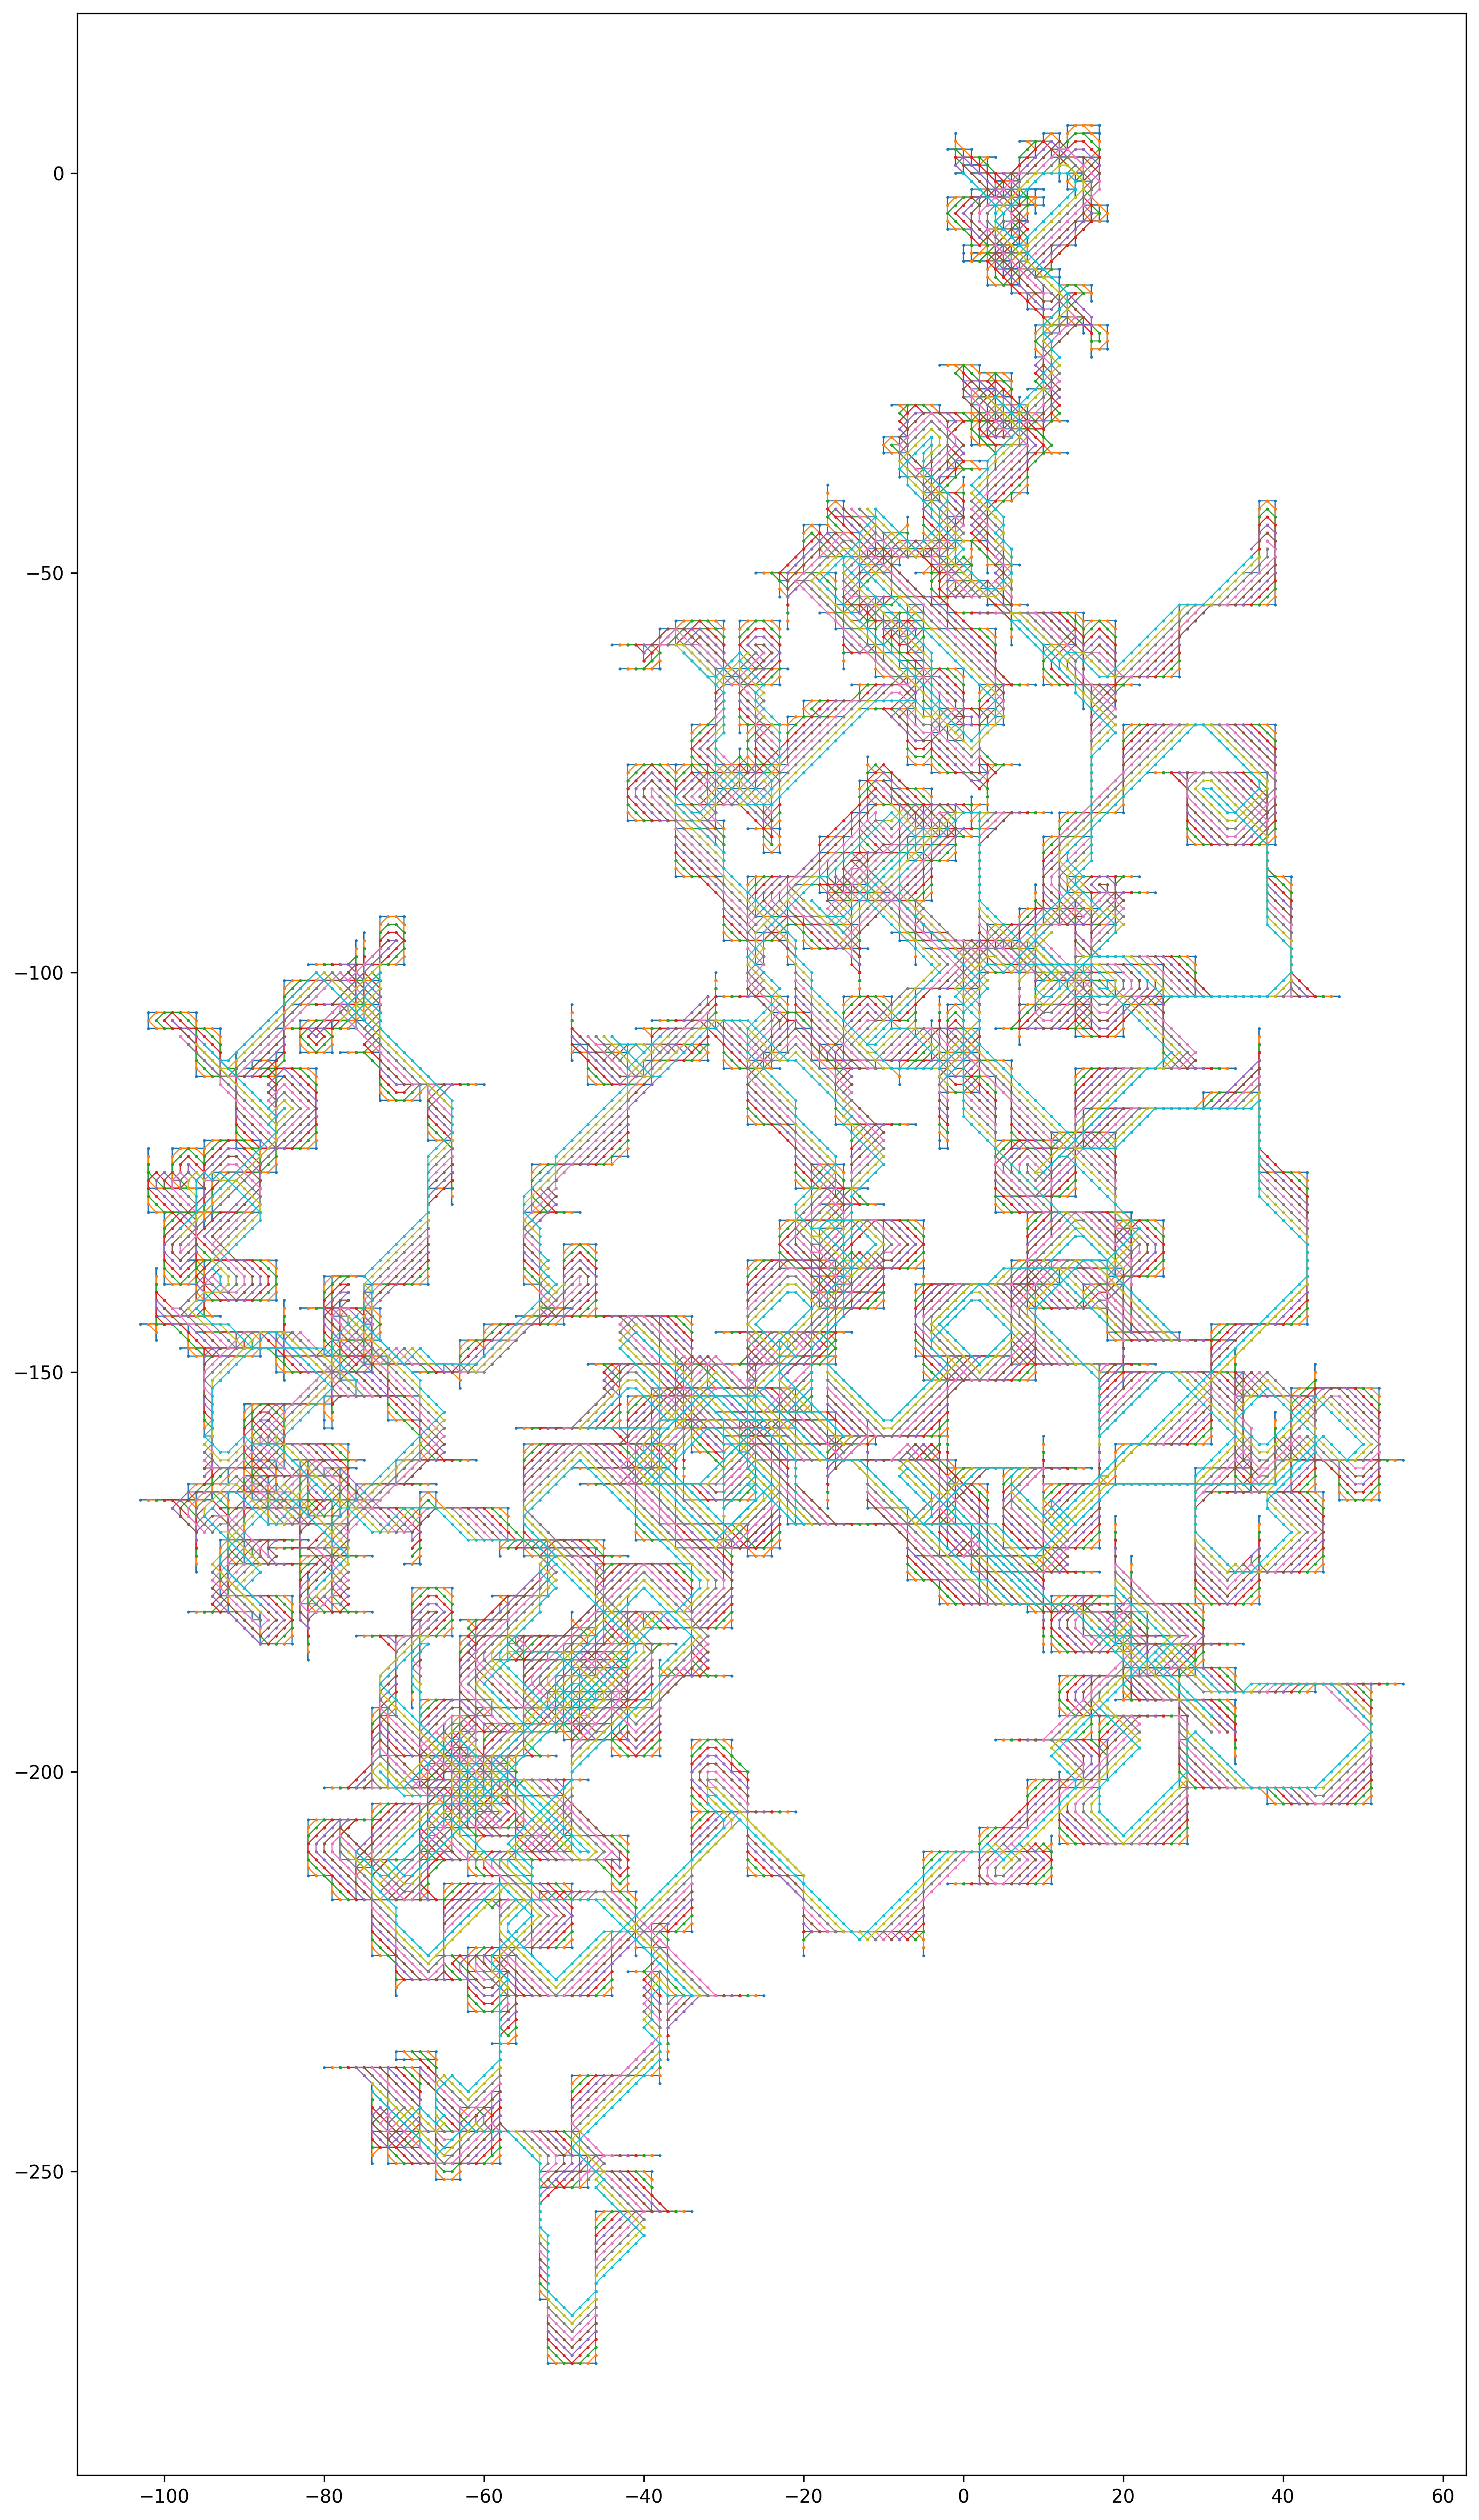

In [26]:
# extra fun

import matplotlib as mpl
import matplotlib.pyplot as plt

# plot
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (24, 24)
fig, ax = plt.subplots()

# data
for node in nodes:
    x, y = zip(*node)
    ax.plot(x, y, alpha=1, linewidth=0.6, marker='o', markersize=0.6)
    ax.set_aspect('equal', adjustable='box')

plt.show()